In [1]:
import numpy as np
import pandas as pd
import yahoo_fin as yf
from yahoo_fin.stock_info import get_data
import matplotlib.pyplot as plt

In [2]:
"""returns the desired stock data(closing prices) in the given timeframe"""


def stock_data(ticks):
    
    data = pd.DataFrame()
    names = list()
    for i in ticks:
        data=pd.concat([data,(get_data(ticker=i,start_date=start,end_date=end)['close'])],axis=1)
        
        names.append(i)
        
    data.columns = names
    
    return data

In [3]:
ticks = ['AAPL','MSFT','GOOGL','NVDA','META','ORCL','ADBE','AMD','SAP','QCOM','CSCO','TSLA','AMZN','COST']
start = '2020-07-13'
end = '2023-07-13'
n_years =3

In [4]:
data = stock_data(ticks)

In [5]:
data.head()

,AAPL,MSFT,GOOGL,NVDA,META,ORCL,ADBE,AMD,SAP,QCOM,CSCO,TSLA,AMZN,COST
2020-07-13 00:00:00,95.477501,207.070007,75.611504,100.522499,239.000000,57.009998,442.470001,53.590000,150.929993,91.330002,45.930000,99.804001,155.199997,322.920013
2020-07-14 00:00:00,97.057503,208.350006,76.042999,103.769997,239.729996,57.200001,433.779999,54.720001,153.850006,92.379997,46.259998,101.120003,154.199997,328.000000
2020-07-15 00:00:00,97.724998,208.039993,75.844002,102.272499,240.279999,56.619999,433.010010,55.340000,156.610001,92.550003,46.400002,103.067329,150.443497,326.700012
2020-07-16 00:00:00,96.522499,203.919998,75.746002,101.347504,240.929993,55.820000,426.290009,54.919998,155.119995,91.199997,45.779999,100.042664,149.994995,326.269989
2020-07-17 00:00:00,96.327499,202.880005,75.842499,102.014999,242.029999,54.900002,432.420013,55.040001,156.279999,92.230003,46.750000,100.056000,148.098495,324.790009


In [50]:
data.shape

(755, 14)

In [51]:
returns = data.pct_change()                                  # daily percentage returns
returns.columns = ticks
annual_returns = pd.DataFrame(returns.mean()*252).T          # mean annual return


In [52]:
annual_returns = annual_returns+1

In [53]:
returns = returns.iloc[1:,:]                                 # delete the first row

In [54]:
geometric_returns = pd.DataFrame(np.prod((1+returns)**(1/n_years)))   # compounded returns provide better idea of loss/gain

In [55]:
overall_returns = pd.concat([annual_returns, geometric_returns.T],axis=0)

In [56]:
overall_returns

,AAPL,MSFT,GOOGL,NVDA,META,ORCL,ADBE,AMD,SAP,QCOM,CSCO,TSLA,AMZN,COST
0,1.278486,1.205494,1.201875,1.635024,1.204834,1.274981,1.115809,1.392285,1.023416,1.168218,1.063466,1.539509,1.01515,1.199599
0,1.257309,1.176495,1.162968,1.634583,1.089798,1.267245,1.046672,1.288274,0.976598,1.091243,1.033756,1.396802,0.94458,1.185484


In [78]:
num_sims = 100000
returns = d_train.pct_change().iloc[1:,:]
cov = returns.cov()*252

portfolio_returns = np.zeros(num_sims)                  # anticipated returns
sharpe = np.zeros(num_sims)                             # sharpe ratio
volatility = np.zeros(num_sims)                         # volatility
weights = np.zeros((num_sims,len(ticks)))               # random weights attached to each asset
 
def montecarlo_sims(ticks,num_sims):
    
    for i in range(num_sims):
        
        weights[i,:] = np.random.random(len(ticks))         # generate random weights
        
        weights[i,:] = weights[i,:]/np.sum(weights[i,:])    # normalise the weights
        
        
        
        portfolio_returns[i] =np.dot(weights[i,:], geometric_returns.T.iloc[0,:])  # calculates the returns as per current weights
        
        
        
        volatility[i] = np.sqrt(np.dot(weights[i,:].T, np.dot(weights[i,:],cov)))  # calculates volatality 
        
        
        sharpe[i] = (portfolio_returns[i]-0.01)/volatility[i]
        
    results_data = {'Returns': portfolio_returns,'volatality': volatility,'sharpe ratio':sharpe}
    
    results = pd.DataFrame(results_data)
    
    return results
        
        

In [79]:
results = montecarlo_sims(ticks,100000)

In [80]:
weights_data = pd.DataFrame(weights,columns=ticks)
results_data = pd.concat([results,weights_data],axis=1)

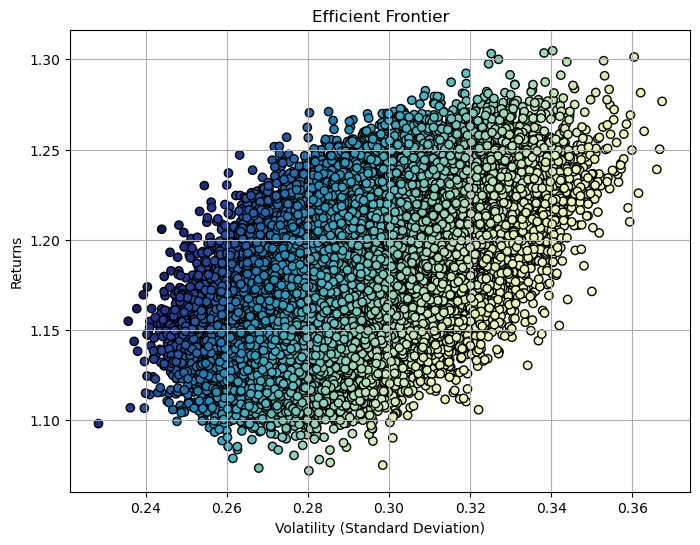

In [81]:
"""plots returns vs volatility(risk) for all the simulation with the gradient showing decreasing sharpe ratio"""

plt.figure(figsize=(8, 6))
plt.scatter(volatility, portfolio_returns, marker='o',c=sharpe, cmap='YlGnBu',edgecolors='black',label='Portfolios')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Returns')
plt.title('Efficient Frontier')
plt.grid(True)

In [82]:
results_data

,Returns,volatality,sharpe ratio,AAPL,MSFT,GOOGL,NVDA,META,ORCL,ADBE,AMD,SAP,QCOM,CSCO,TSLA,AMZN,COST
0,1.147644,0.286755,3.967310,0.005593,0.032501,0.047993,0.029491,0.103286,0.056089,0.054695,0.132094,0.034683,0.134232,0.094817,0.028714,0.093763,0.152050
1,1.167364,0.267131,4.332580,0.060626,0.112912,0.029068,0.041391,0.108546,0.059295,0.077786,0.030367,0.051939,0.083238,0.127304,0.062801,0.005980,0.148748
2,1.159982,0.284891,4.036569,0.000245,0.052921,0.107806,0.054187,0.056335,0.046391,0.067608,0.031464,0.089882,0.098434,0.118185,0.118345,0.075668,0.082528
3,1.169740,0.310462,3.735527,0.080346,0.140398,0.027531,0.049955,0.005698,0.012927,0.024102,0.146707,0.030419,0.153799,0.069662,0.056817,0.144882,0.056757
4,1.127579,0.277711,4.024250,0.009189,0.081675,0.001452,0.022219,0.002153,0.123967,0.157965,0.128554,0.056457,0.048424,0.079767,0.012937,0.179603,0.095637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.202659,0.301035,3.961864,0.115918,0.093930,0.132643,0.052266,0.086364,0.087748,0.016645,0.019669,0.026102,0.094609,0.042047,0.135692,0.071980,0.024386
99996,1.200402,0.283737,4.195441,0.112667,0.021714,0.070986,0.080240,0.109886,0.104351,0.067810,0.056908,0.100050,0.021749,0.060906,0.076352,0.024140,0.092240
99997,1.215936,0.262957,4.586051,0.049156,0.110545,0.150221,0.087420,0.028232,0.121000,0.005619,0.028055,0.047241,0.006089,0.126792,0.089270,0.026746,0.123613
99998,1.173732,0.279467,4.164111,0.026663,0.038192,0.054152,0.076430,0.045698,0.127142,0.080346,0.022103,0.101484,0.080332,0.091487,0.099810,0.091372,0.064789


In [83]:
results_data['returns vs risk'] = results_data['Returns']/results_data['volatality']

In [84]:
optimal_weights = results_data.iloc[results_data['returns vs risk'].idxmax()][3:-1] # returns the optimal weights for highest returns/risk

In [85]:
test_returns = ((d_test.iloc[-1,:]-d_test.iloc[0,:])/d_test.iloc[0,:])

In [86]:
optimal_weights

AAPL     0.122901
MSFT     0.122682
GOOGL    0.089196
NVDA     0.050895
META     0.013230
ORCL     0.146366
ADBE     0.001524
AMD      0.015960
SAP      0.010874
QCOM     0.032375
CSCO     0.189817
TSLA     0.065767
AMZN     0.000298
COST     0.138115
Name: 16843, dtype: float64